### Treść zadania

###### Zaimplementuj znajdowanie poprzednika/następnika wskazanego elementu w drzewie BST.

### Złożoność

###### Obliczeniowa:
$ O(log(n)) $ (lub $ O(n) $ w przypadku niezbalansowanych drzew)
###### Pamięciowa:
$ O(1) $

### Implementacja

In [1]:
class BSTNode:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.parent = self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
        
    def insert(self, key, val):
        node = BSTNode(key, val)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        node.parent = curr
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        node.parent = curr
                        break
                # Return False if a node with the same key already exists
                # (We won't change its value)
                else:
                    return False
        # Return True if an object was successfully inserted to BST
        return True
    
    def find(self, key):
        curr = self.root
        while curr:
            # Enter the left subtree
            if key < curr.key:
                curr = curr.left
            # Enter the right subtree
            elif key > curr.key:
                curr = curr.right
            # Return a node which was found
            else:
                return curr
        # If no node of the specified key was found, return None
        return None
    
    """ Kod do zaimplementowania w zadaniu, znajduje się niżej: """
    def min_child(self, node):
        while node.left:
            node = node.left
        # Return a node of the minimum key
        return node
    
    def max_child(self, node):
        while node.right:
            node = node.right
        # Return a node of the maximum key
        return node
    
    def successor(self, node):
        if node.right:
            return self.min_child(node.right)
        while node.parent:
            if node.parent.left == node:
                return node.parent
            node = node.parent
        return None
        
    def predecessor(self, node):
        if node.left:
            return self.max_child(node.left)
        while node.parent:
            if node.parent.right == node:
                return node.parent
            node = node.parent
        return None

###### Kilka testów

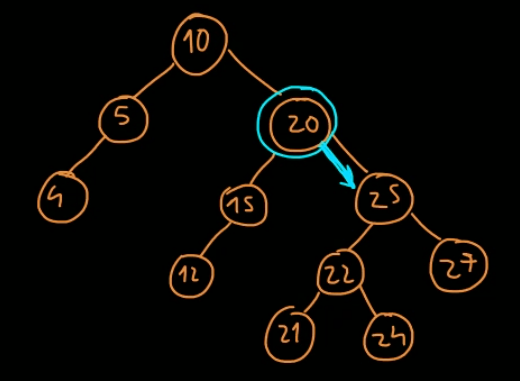

In [2]:
t = BST()
# Przy zmienionej kolejności elementów, możemy uzyskać inne drzewo, ale zawsze będzie ono spełniać
# warunki drzewa BST, czyli wszystkie klucze w lewym poddrzewie danego danego węzła będą mniejsze od
# niego, natomiast wszystkie klucze w prawym poddrzewie od niego większe
for n in (10, 5, 20, 4, 15, 25, 12, 22, 21, 24, 27):  
    t.insert(n, [])

In [3]:
print(t.successor(t.find(20)).key)
print(t.successor(t.find(15)).key)
print(t.successor(t.find(12)).key)
print(t.successor(t.find(25)).key)
print(t.successor(t.find(4)).key)
print(t.successor(t.find(10)).key)
print(t.successor(t.find(27)))

21
20
15
27
5
12
None


In [4]:
print(t.predecessor(t.find(20)).key)
print(t.predecessor(t.find(15)).key)
print(t.predecessor(t.find(12)).key)
print(t.predecessor(t.find(25)).key)
print(t.predecessor(t.find(4)))
print(t.predecessor(t.find(10)).key)

15
12
10
24
None
5
